## Variável Endógena: IV, 2SLS, GMM e Equações Simultâneas

Prof. Daniel de Abreu Pereira Uhr


### Conteúdo
* Regressão com variável endógena
  * Variáveis Instrumentais (IV)
  * Mínimos Quadrados em Dois Estágios (2SLS)
  * Método Generalizado dos Momentos (GMM)

* Viés de simultaneidade
  * Modelo de Equações Simultâneas
  * Identificação Parcial - IV/2SLS

## Regressão com Variável Endógena


### IV - Instrumental Variable estimation

#### Aspectos históricos e o problema da endogeneidade
A primeira abordagem conhecida do uso de Variáveis Instrumentais aparece no **Apêndice B** de um livro escrito por **Philip G. Wright**, *The Tariff on Animal and Vegetable Oils*, publicado em **1928**. Ele apresenta nesse apêndice, duas derivações separadas e corretas dos estimadores das variáveis instrumentais das elasticidades da oferta e da demanda; e uma aplicação empírica à manteiga e à linhaça. **O grande avanço do Apêndice B** foi mostrar que a regressão de variáveis instrumentais pode ser usada **para estimar o coeficiente em um regressor endógeno**, algo que a regressão de mínimos quadrados comum não pode fazer, o que torna a regressão de variáveis instrumentais uma técnica central da micro e macroeconometria modernas. Curiosidade, o Apêndice B apresenta certa diferença com relação ao restante do livro, então sua autoria foi questionada. O autor alternativo plausível é o **filho mais velho de Philip Wright, Sewall**, que em 1928 já era um **importante estatístico genético**. E a segunda das duas derivações do estimador de variável instrumental no Apêndice B usa o método de **"Path coeficients"**, que Sewall havia desenvolvido recentemente (S. Wright, 1921).

No caso seminal analisado por Wright, o autor se deparou com **endogeneidade devido a simultaneidade**. Vimos que a existência de **endogeneidade** no modelo econométrico implica que os **coeficientes estimados são enviesados e inconsistentes**. E em termos gerais, essa endogeneidade sempre decorre da quebra da hipótese de **exogeneidade estrita (não-confundimento)**. Logo os termos de erro são sistematicamente correlacionados com uma ou mais variáveis explicativas.

#### Hipótese de identificação

Vimos que a **endogeneidade** torna o estimador de OLS enviesado e inconsistente, e ela pode ser causada por **simultaneidade**, **erros de medida** ou **variáveis omitidas**. Uma causa importante de viés nas análises empíricas dentro das ciências sociais aplicadas deve-se às **características específicas individuais**. Usualmente essas características individuais não são observáveis pelo pesquisador.

Então, como a fonte de endogeneidade é **não observável** ao pesquisador (sabemos que existe essa característica não observável, e não temos como controla-la diretamente na equação), dizemos que o estimador de variáveis instrumentais consegue controlar o viés devido às **características não observáveis** (**viés em características não observáveis**).


#### O que é uma variável instrumental?

O **estimador de Variável Instrumental (VI)**, também é conhecido como **IV** devido o termo em inglês: *Instrumental Variables estimation*. Este estimador é do tipo **exatamente identificado**; Um estimador IV é dito exatamente identificado quando é baseado em exatamente uma variável instrumental, que afeta $Y$ através de $X$.

A Variável Instrumental (ou instrumento, $Z$) é uma **variável exógena** *excuída da equação econométrica*, ou seja, não se relaciona diretamente com a variável $Y$ (nem com o termo de erro). E a única forma de $Z$ afetar $Y$ é, somente, através de $X$. Então, $Z$ é dita uma variável instrumental para $X$.

Condições para ser Variável Instrumental:

* **Validade/Restrição de exclusão**: $Z$ é dita exógena à equação, isso significa que $Z$ não deve ser correlacionada com as variáveis omitidas.

* **Relevância do Instrumento/Força**: $Z$ deve ser correlacionado (ou positivamente, ou negativamente) com a variável explicativa endógena.

In [1]:
# Importando o pacote para fazer a visualização do grafo
import graphviz as gr

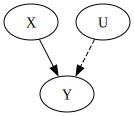

In [2]:
# Grafo indicando a variável de tratamento D, e um confounding U, e a variável de resultado Y
g = gr.Digraph()
g.edge("X", "Y")
g.edge("U", "Y", style="dashed")
g

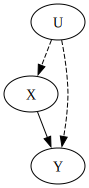

In [3]:
# Grafo indicando a variável de tratamento D, e um confounding U, e a variável de resultado Y
g = gr.Digraph()
g.edge("X", "Y")
g.edge("U", "X", style="dashed")
g.edge("U", "Y", style="dashed")
g

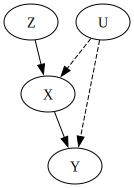

In [4]:
# Grafo indicando a variável de tratamento D, e um confounding U, e a variável de resultado Y
g = gr.Digraph()
g.edge("Z", "X")
g.edge("X", "Y")
g.edge("U", "X", style="dashed")
g.edge("U", "Y", style="dashed")
g

Retomando, duas condições básicas são necessárias para estimar o modelo econométrico com variável Instrumental para x endógeno.

**Primeira condição**, precisamos de um **instrumento Válido** ($Z$), isto é, uma variável que não seja correlacionada com o termo de erro (com variáveis não observáveis contidas no termo de erro) [satisfazer a restrição de exclusão].

$$ 𝑪𝒐𝒗(𝒁,𝒖)=𝟎 $$

**Segunda condição**, o instrumento ser correlacionado com a variável endógena, ou seja, exista relevância do instrumento (força)

$$ 𝑪𝒐𝒗(𝒁,𝒙)  \neq  𝟎 $$

A primeira condição ($ 𝑪𝒐𝒗(𝒁,𝒖)=𝟎 $), não pode ser testada empiricamente. Normalmente essa condição é argumentada teoricamente (para regressões com apenas uma variável instrumental). Assim, nos artigos são apresentadas as possíveis justificativas teóricas para suportar essa hipótese.

**Exemplo** 

Suponha uma equação salarial, em função das variáveis educação e experiência no emprego (**Equação estrutural**). Considere que a medida de educação é uma variável endógena e que a medida de tempo de experiência no trabalho é uma variável exógena.

$$ 
ln(wage) = \beta_{0} + \beta_{1}educ + \beta_{2}expr + \beta_{3}expr2 + \epsilon
$$

O termo de erro contém variáveis não observáveis, como por exemplo, habilidade, motivação, disciplina nos estudos, etc. Ou seja, a variável educação e o termo de erro estão sistematicamente correlacionados. Logo, a variável educação é endógena. Assim, estimativas desconsiderando a endogeneidade geram coeficientes enviesados e inconsistentes. A literatura procurou possíveis variáveis instrumentais válidas para lidar com esse tipo de problema, como por exemplo: Educação da Mãe, Distância do alojamento até a universidade, “Path dependence”, Igrejas no município no passado, relações geográficas, entre outras. Todas apresentavam suas justificativas teóricas para tornar a variável válida.

A **segunda condição** pode ser facilmente testada no chamado **"Primeiro Estágio da Regressão"** (**Equação de determinação**). Basta rodar uma regressão linear, onde a **variável dependente** torna-se o **$X$ endógeno**, e as **variáveis explicativas** sejam **$Z$** (instrumento excluído) e **exper** (variável exógena/incluída no modelo).

$$
educ = \alpha_{0} + \alpha_{1}expr + \alpha_{2}expr2 + \alpha_{3}z + \epsilon
$$

onde 

$$
\alpha_{3}= \frac{Cov(z,educ)}{Var(z)}
$$



Para identificação do coeficiente beta associado à variável endógena, no contexto de variável instrumental, temos que sob a Hipótese de $ 𝑪𝒐𝒗(𝒁,𝒖)=𝟎 $, e se e $ 𝑪𝒐𝒗(𝒁,𝒙)  \neq  𝟎 $, então algebricamente:

$$
Y = X\beta + \epsilon
$$

Multiplicando, pela esquerda, a equação pelo vetor de variáveis instrumentais $Z$ (obs, as variáveis exógenas são instrumentos delas mesmas), temos:

$$
Z'Y = Z'X\beta + Z'\epsilon
$$

Aplicando o operador esperança, temos:

$$
E(Z'Y) = E(Z'X\beta) + E(Z'\epsilon)
$$

A primeira hipótese é que $ 𝑪𝒐𝒗(𝒁,𝒖)=𝟎 $, então $E(Z'\epsilon)=0$, logo:

$$
E(Z'Y) = E(Z'X\beta)
$$

Como o operador esperança é linear, então:

$$
E(Z'Y) = E(Z'X)\beta
$$

Analogamente à hipótese de posto completo (Hipótese 3 do OLS), temos que $E(Z'X)$ é uma matriz quadrada de posto completo, logo é inversível. Então:

$$
\beta = [E(Z'X)]^{-1}E(Z'Y)
$$

Ou seja, 

>$$
>\beta_{IV} = [E(Z'X)]^{-1}E(Z'Y) = \frac{Cov(Z,Y)}{Cov(Z,X)}
>$$

Agora, vamos verificar se o estimador IV é não viesado e consistente (propriedades assintóticas). Para isso, vamos substituir $Y$ pelo valor populacional, e reescrever o estimador IV algebricamente, como:

$$
\beta_{IV} = (Z´X)^{-1}Z´(X\beta + \epsilon)
$$

$$
\beta_{IV} = (Z´X)^{-1}(Z´X)\beta + (Z´X)^{-1}(Z´\epsilon)
$$

$$
\beta_{IV} = \beta + (Z´X)^{-1}(Z´\epsilon)
$$

Aqui vemos a necessidade de $ 𝑪𝒐𝒗(𝒁,𝒖)=𝟎 $, pois se $Z$ for correlacionado com o termo de erro, então o estimador IV será enviesado. 


**Para a inferência** do estimador IV, precisamos achar a variância do beta estimado por IV, que é dada por:

$$
V(\beta_{IV}) = (Z´X)^{-1}(Z´\epsilon \epsilon´ Z)(X´Z)^{-1}
$$

>$$
>V(\beta_{IV}) = \sigma^{2}(Z´X)^{-1}(Z´Z)(X´Z)^{-1}
>$$

Vamos aplicar dois truques nessa relação. Primeiro, multiplicamos por $(X´X)(X´X)^{-1}$ e rearranjamos os termos:

$$
V(\beta_{IV}) = \sigma^{2}\frac{(Z´Z)}{(Z´X)}\frac{I}{(X´Z)}(X´X)(X´X)^{-1}
$$

Segundo truque:

$$
V(\beta_{IV}) = \sigma^{2}\frac{(Z´Z)^{1/2}}{(Z´X)}\frac{(Z´Z)^{1/2}}{(X´Z)}(X´X)^{1/2}(X´X)^{1/2}(X´X)^{-1}
$$

rearanjando os termos:

$$
V(\beta_{IV}) = \sigma^{2}\frac{(Z´Z)^{1/2}(X´X)^{1/2}}{(Z´X)}\frac{(Z´Z)^{1/2}(X´X)^{1/2}}{(X´Z)}(X´X)^{-1}
$$

Lembrando que o coeficiente de correlação ($\rho$) entre duas variáveis $X$ e $Y$ é dado por:
$$
\rho_{xy} = \frac{Cov(X,Y)}{\sqrt{V(X)}\sqrt{V(Y)}}
$$

Então, voltando à variância do estimador IV, temos que:

$$
V(\beta_{IV}) = \sigma^{2}\frac{1}{\rho_{zx}}\frac{1}{\rho_{zx}}(X´X)^{-1}
$$

Como o produto do coeficiente de correlão é o coeficiente de determinação, $R^{2}$, então:

$$
V(\beta_{IV}) = \sigma^{2}(X´X)^{-1} \frac{1}{\rho_{zx}^{2}} 
$$

$$
V(\beta_{IV}) = \sigma^{2}(X´X)^{-1}\frac{1}{R_{zx}^{2}} 
$$

Isso nos mostra que quanto maior a correlação entre a Variável Instrumental e a Variável Endógena, menor a variância do beta estimado por IV. O limite da correlação é 1, onde a variância do beta estimado pelo estimador IV apresenta a mesma variância do beta estimado pelo estimador de OLS.

**Supondo que exista uma pequena correlação entre z e u**, então o estimador apresenta viés assintótico, vimos que:

$$
\beta_{IV} = \beta + (Z´X)^{-1}(Z´\epsilon)
$$

Adicionando $(X´X)^{1/2}(X´X)^{-1/2}$, $(\epsilon´\epsilon)^{1/2}(\epsilon´\epsilon)^{-1/2}$ e $(Z´Z)^{1/2}(Z´Z)^{-1/2}$, temos:

$$
\beta_{IV} = \beta + \frac{(X´X)^{1/2}(Z´Z)^{1/2}}{(Z´X)}\frac{(Z´\epsilon)}{(Z´Z)^{1/2}(\epsilon´\epsilon)^{1/2}}\frac{(\epsilon´\epsilon)^{1/2}}{(X´X)^{1/2}}
$$

$$
\beta_{IV} = \beta + \frac{\rho(z,u)}{\rho(z,x)}\frac{\sigma_{\epsilon}}{\sigma_{x}}
$$

Logo, mesmo que a correlação entre z e u seja pequena, a inconsistência do estimador IV pode ser grande se corr(z,x) também for pequena.
Assim, Estimações por IV podem produzir resultados estranhos quando existir alguma correlação entre z e u, e a condição de relevância (Força) do instrumento for fraca (instrumento fraco).

Vamos fazer um exemplo no Python.

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import linearmodels.iv.model as lm
import pandas as pd
import numpy as np
import requests
import pyreadstat

In [6]:
# Carregar o arquivo de dados
url = "https://github.com/Daniel-Uhr/data/raw/main/griliches76.dta"
response = requests.get(url)
with open('griliches76.dta', 'wb') as f:
    f.write(response.content)
data, metadata = pyreadstat.read_dta('griliches76.dta')

# Criar a coluna 'expr2' com o quadrado da coluna 'expr'
data['expr2'] = data['expr'] ** 2

mlr1 = smf.ols("lw ~ expr + expr2 + s", data=data).fit()

print(mlr1.summary())


                            OLS Regression Results                            
Dep. Variable:                     lw   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     108.3
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           2.71e-58
Time:                        09:30:23   Log-Likelihood:                -297.71
No. Observations:                 758   AIC:                             603.4
Df Residuals:                     754   BIC:                             621.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1919      0.086     48.991      0.0

In [7]:
# Breush-Pagan test
# Null Hypothesis: Heteroscedasticity is not present
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(mlr1.resid, mlr1.model.exog)
print(test)

(4.425385008697046, 0.21904311880427887, 1.4759610307892574, 0.21973533184144928)


In [8]:
# Goldfeld-Quandt test
# Null Hypothesis: Heteroscedasticity is not present
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(mlr1.resid, mlr1.model.exog)
print(test)

(1.1441699259710185, 0.09634420462928885, 'increasing')


A regressão ingênua (OLS), mostra que um ano de escolaridade adicional, em média, aumenta em aproximadamente 11,31% os salários ($[exp(0,1071)-1]*100$).

Antes de usarmos uma variável $Z$ como um instrumento (Educação da Mãe), precisamos ter certeza de que é válida. Isso implica argumentar a favor das duas hipóteses de Variáveis ​​Instrumentais:

* **Primeira condição**, [satisfazer a restrição de exclusão]: $Z$ afeta $Y$ apenas através de $X$, $ 𝑪𝒐𝒗(𝒁,𝒖)=𝟎 $
* **Segunda condição**, Devemos ter um primeiro estágio forte, ou seja, o instrumento realmente afeta $X$, $ 𝑪𝒐𝒗(𝒁,𝒙)  \neq  𝟎 $

Lembre que apenas a segunda suposição é verificável.

In [9]:
mdata = sm.add_constant(data=data, prepend=False)
mlr2 = lm.IV2SLS(dependent=mdata["lw"], exog=mdata[["const", "expr", "expr2"]], endog=mdata["s"], instruments=mdata[["med"]]).fit(cov_type="homoskedastic", debiased=True)
print(mlr2.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                     lw   R-squared:                      0.2655
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2626
No. Observations:                 758   F-statistic:                    21.049
Date:                Tue, Aug 06 2024   P-value (F-stat)                0.0000
Time:                        09:30:47   Distribution:                 F(3,754)
Cov. Estimator:         homoskedastic                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          3.6762     0.2721     13.510     0.0000      3.1420      4.2103
expr           0.0241     0.0170     1.4197     0.15

Mas será que o instrumento é forte? Para responder a essa pergunta, vamos estimar o primeiro estágio da regressão, onde a variável dependente é a educação, e as variáveis explicativas são a experiência, experiência ao quadrado, e o instrumento (Escolaridade da Mãe).

In [10]:
print(mlr2.first_stage)

    First Stage Estimation Results    
                                     s
--------------------------------------
R-squared                       0.1523
Partial R-squared               0.0990
Shea's R-squared                0.0990
Partial F-statistic             82.834
P-value (Partial F-stat)      1.11e-16
Partial F-stat Distn          F(1,754)
========================== ===========
const                           10.966
                              (33.074)
expr                           -0.1331
                             (-1.4345)
expr2                          -0.0102
                             (-0.8322)
med                             0.2517
                              (9.1013)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


Sim, há correlação forte entre o instrumento e a variável endógena. E no caso de usar erros padrão robustos à heterocedasticidade? 

In [11]:
# Erros padrão robustos
mlr3 = lm.IV2SLS(dependent=mdata["lw"], exog=mdata[["const", "expr", "expr2"]], endog=mdata["s"], instruments=mdata[["med"]], weights=None).fit(cov_type="robust")
print(mlr3.summary)


                          IV-2SLS Estimation Summary                          
Dep. Variable:                     lw   R-squared:                      0.2655
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2626
No. Observations:                 758   F-statistic:                    73.034
Date:                Tue, Aug 06 2024   P-value (F-stat)                0.0000
Time:                        09:31:15   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          3.6762     0.2599     14.145     0.0000      3.1668      4.1856
expr           0.0241     0.0161     1.5012     0.13

### 2SLS - Two Stage Least Squares

**E se nós temos mais de um instrumento?** 

Os Mínimos Quadrados em Dois Estágios (*Two Stage Least Squares*) é um estimador de **variável instrumental sobreidentificado** (Multiplos Instrumentos), ou seja, utiliza um vetor de instrumentos que afetam $Y$ através do $X$ endógeno.

A ideia por trás do estimador é que **utilizar mais instrumentos é melhor que utilizar apenas um** porque mais instrumentos geram mais variação exógena em $X$. Diminuindo a variância do beta estimado.


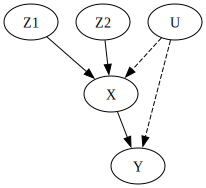

In [12]:
# Grafo indicando a variável de tratamento D, e um confounding U, e a variável de resultado Y
g = gr.Digraph()
g.edge("Z1", "X")
g.edge("Z2", "X")
g.edge("X", "Y")
g.edge("U", "X", style="dashed")
g.edge("U", "Y", style="dashed")
g

Considere o modelo:

$$
y_{i} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \epsilon_{i}
$$

onde $x_{2}$ é **endógena**. Suponha que temos três variáveis exógenas disponíveis. A $x_{1}$, $z_{1}$ e $z_{2}$. Dizemos que $z_{1}$ e $z_{2}$ são **variáveis exógenas excluídas** porque não pertecenm a relação estrutural.

Supomos que $z_{1}$ e $z_{2}$ não são correlacionadas com o termo de erro (respeitam a condição de exclusão), então são válidas.

Se ambas forem correlacionadas com a variável endógena $x_2$, poderíamos usar apenas uma das duas variáveis, **mas como a combinação das variáveis instrumentais pode gerar maior variação exógena**, utilizamos a seguinte equação de primeiro estágio:

$$
x_{2i} = \alpha_{0} + \alpha_{1}x_{1i} + \alpha_{2}z_{1i} + \alpha_{3}z_{2i} + \eta_{i}
$$

Supondo que $\alpha_2 \neq 0$  e $\alpha_3 \neq 0$. Conseguimos estimar a regressão e obter os valores estimados para $\hat{𝑥}_2$

$$
\hat{x}_{2i} = \hat{\alpha}_{0} + \hat{\alpha}_{1}x_{1i} + \hat{\alpha}_{2}z_{1i} + \hat{\alpha}_{3}z_{2i}
$$

Uma vez obtido o ($\hat{x}_{2i} $) para a variável endógena, **podemos utiliza-lo como IV de $𝑥_2$**.

Então com instrumentos múltiplos, o estimador de IV que usa $\hat{x}_{2i} $ como instrumento é chamado de **Mínimos Quadrados em Dois Estágios**. A ideia é que o primeiro estágio do MQ2E “expurga” de $𝑥_2$ sua correlação com $u$, antes de rodar o MQO de $y$ sobre $𝑥_1$ e $\hat{x}_{2i} $.


**Generalizando o estimador 2SLS**

Considere um modelo estrutural com $x_{k}$ endógeno:

$$
y_{i} = \beta_{0} + \beta+{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{k}x_{k} + \epsilon_{i}
$$

Assuma que possuímos $n$ instrumentos externos: $𝑍_1, 𝑍_2, 𝑍_3, …, 𝑍_𝑛$. E que a restrição de exclusão é satisfeita: $𝑪𝒐𝒗(𝒁,𝒖)=𝟎 $ para todo $𝑍_𝑖$


Considere a matriz de instrumentos $𝑍 = (x_{1}, x_{2}, ... x_{k-1}, z_{1}, z_{2}, ..., z_{n})$.

A regressão do primeiro estágio (forma reduzida) é dada por:

$$
x_{ki} = \alpha_{0} + \alpha_{1}x_{1i} + \alpha_{2}x_{2i} + ... + \alpha_{k-1}x_{k-1i} + \theta_{1}z_{1i} + \theta_{2}z_{2i} + ... + \theta_{n}z_{ni} + \eta_{i}
$$

O resultado do Primeiro estágio gera  $\hat{x}_{ki} $. No segundo estágio utilizamos a matriz $\hat{X}=(x_{1}, x_{2}, ... x_{k-1}, \hat{x}_{k})$ e rodamos:

$$
\beta_{2SLS} = (\hat{X}'\hat{X})^{-1}\hat{X}'y
$$


Observação, esse estimador pode ser estimado em um único estágio, utilizando a matriz de instrumentos $Z$:

$$
\beta_{2SLS} = (X'Z(Z´Z)^{−1}Z´X)^{-1}X´Z(Z´Z)^{−1}Z'Y
$$



#### **Considerações gerais sobre IV/2SLS**

**Hipótese Fundamental (de identificação)**: O indivíduo na amostra escolhe o *nível/quantidade de $x$* (endógeno) a partir de características não observáveis (no termo de erro).

* Os instrumentos, variáveis $Z_{i}´s$ exógenas, **afetam a decisão sobre o nível de escolha (participação)**, e não estão correlacionadas com nenhum fator não observável relacionado ao resultado potencial. [hipóteses de força e validade dos instrumentos].
* Normalmente, **supomos que o efeito da variável endógena é homogêneo** entre os indivíduos que decidiram pelo determinado nível de $X$ (endógeneo). Entretanto, os instrumentos disponíveis podem afetar apenas uma porção destes indivíduos, gerando assim betas IV com efeito heterogêneos. Ou seja, os efeitos estimados são especificadamente para aqueles que são realmente afetados/induzidos pelo instrumento a ter uma mudança de comportamento na variável endógena.
* Logo, o **IV/2SLS é a identificação dos betas** para aqueles indivíduos influenciados pela variável instrumental.

Vamos desenvolver esse método mais a fundo na próxima parte do curso.

Voltemos ao nosso exemplo, agora com mais instrumentos (Escolaridade da Mãe, Nota em teste de QI, e Nota).


In [13]:
# Agora vamos rodar a regressão de 2SLS com 3 instrumentos excluídos
mlr4 = lm.IV2SLS(dependent=mdata["lw"], exog=mdata[["const", "expr", "expr2"]], endog=mdata["s"], instruments=mdata[["med", "iq", "kww"]]).fit(cov_type="homoskedastic", debiased=True)
print(mlr4.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                     lw   R-squared:                      0.2560
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2531
No. Observations:                 758   F-statistic:                    66.770
Date:                Tue, Aug 06 2024   P-value (F-stat)                0.0000
Time:                        09:31:25   Distribution:                 F(3,754)
Cov. Estimator:         homoskedastic                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          3.6114     0.1502     24.037     0.0000      3.3165      3.9064
expr           0.0250     0.0168     1.4877     0.13

Os resultamos mostram uma melhora na estatística de teste (T-stat) do coeficiente de escolaridade. 

In [14]:
print(mlr4.first_stage)

    First Stage Estimation Results    
                                     s
--------------------------------------
R-squared                       0.3725
Partial R-squared               0.3331
Shea's R-squared                0.3331
Partial F-statistic             125.20
P-value (Partial F-stat)      1.11e-16
Partial F-stat Distn          F(3,752)
========================== ===========
const                           3.3998
                              (6.1400)
expr                           -0.1302
                             (-1.6214)
expr2                          -0.0063
                             (-0.5921)
med                             0.1412
                              (5.7007)
iq                              0.0593
                              (11.360)
kww                             0.0705
                              (7.3946)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


Agora vamos utilizar erros padrão robustos à heterocedasticidade.

In [15]:
mlr5 = lm.IV2SLS(dependent=mdata["lw"], exog=mdata[["const", "expr", "expr2"]], endog=mdata["s"], instruments=mdata[["med", "iq", "kww"]]).fit(cov_type="robust", debiased=True)
print(mlr5.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                     lw   R-squared:                      0.2560
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2531
No. Observations:                 758   F-statistic:                    64.461
Date:                Tue, Aug 06 2024   P-value (F-stat)                0.0000
Time:                        09:31:45   Distribution:                 F(3,754)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          3.6114     0.1540     23.452     0.0000      3.3091      3.9137
expr           0.0250     0.0159     1.5692     0.11

#### Testes de Endogeneidade

**A variável “X” é realmente endógena?**

Normalmente a endogeneidade é identificada pelo pesquisador quando a variável “X” é, também, em outros trabalhos, uma variável de resultado. 

Por exemplo: 

* Em caso microeconômico, a variável de educação é endógena quando considerada para explicar os níveis salariais. 
* No caso macroeconômico, ao considerarmos o PIB como medida para explicar o nível de poluição de um país, incorremos no mesmo problema.

Entretanto, podemos testa-la formalmente através do Teste de endogeneidade de **Wu-Hausman/Durbin-Wu-Hausman/Hausman** (1978).


**Teste de Endogeneidade (2SLS) - Wu-Hausman: (verificar se a variável de Xk é endógena)**
* $H_0$: O regressor é exógeno.

**Passos:**

* 1. Regredir $X_{k}$ em $Z$ e outras $X$ exógenas, obter os resíduos $v$ (estes resíduos refletem todas as heterogeneidades não observadas que afetam a variável $X_{k}$ que não foram capturadas pelos instrumentos e variáveis exógenas do modelo).
* 2. Regredir $Y$, $X_{exógenas}$, $X_{endogena}$ e $v$. Se o coeficiente relacionado à $v$ é estatisticamente diferente de 0, então as características não observáveis que afetam conjuntamente a variável $X_{k}$ e os resultados $Y$ são significativos, e a hipótese nula de que $X_{k}$ é exógena é rejeitada. Existem efeitos não observáveis.

Logo, devemos utilizar a metodologia de variáveis instrumentais!

O teste pode ser estendido para múltiplos regressores endógenos ao incluirmos o vetor de resíduos e testar a correlação de cada um...


In [16]:
print(mlr4.wu_hausman())

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 25.0642
P-value: 0.0000
Distributed: F(1,753)


In [17]:
print(mlr4.wooldridge_regression)

Wooldridge's regression test of exogeneity
H0: Endogenous variables are exogenous
Statistic: 25.0426
P-value: 0.0000
Distributed: chi2(1)


Rejeitamos a hipótese nula de que o coeficiente de 's' é exógeno. Logo, realmente devemos utilizar a técnica de 2SLS.

E o Teste de **Sargan** (1958) é utilizado para testar a validade conjunta dos instrumentos. **Os instrumentos conjuntamente são validos?**

In [18]:
print(mlr4.sargan)

Sargan's test of overidentification
H0: The model is not overidentified.
Statistic: 0.4248
P-value: 0.8086
Distributed: chi2(2)


E os instrumentos são fortes? 

Para testar isso, fazemos o **Teste F sobre os intrumentos excluídos** (no primeiro estágio da regressão).

In [20]:
first_stage = smf.ols('s ~ med + iq + kww + expr + expr2', data=data).fit()
print(first_stage.summary())

                            OLS Regression Results                            
Dep. Variable:                      s   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     89.30
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           9.79e-74
Time:                        09:32:41   Log-Likelihood:                -1506.9
No. Observations:                 758   AIC:                             3026.
Df Residuals:                     752   BIC:                             3054.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3998      0.554      6.140      0.0

In [23]:
print(first_stage.f_test(['med','iq','kww']))

<F test: F=125.20131017914196, p=8.911498561591175e-66, df_denom=752, df_num=3>


O teste F mostra uma estatística de teste de 124,56. Logo, os instrumentos são conjuntamente diferentes de zero. Ou seja, consideramos os instrumentos fortes (F>10).

### GMM

**Método Generalizado dos Momentos – GMM; Lars Peter Hansen (1982)**

O método GMM é uma generalização do método IV, que permite a utilização de mais instrumentos que o número de variáveis endógenas. 

Seja $Z$ o conjunto de variáveis exógenas $(nxL)$, onde $Z=[Z_{1} Z_{2}]$

* $L_{1}$: instrumentos excluídos ($Z_{1}$)
* $L_{2}$: ($L-L_{1}$) são os instrumentos incluídos ($Z_{2}$)

A condição de ordem para identificação: L maior ou igual a K
* L>k sobreidentificada
* L=k equação exatamente identificada.

Sob a **Hipótese GMM1** 

$$ E[Z_{i},u_{i}]=0 $$

E seja g(.) uma função (linear ou não linear), então,

$$ g(\beta)= Z_{i}'u_{i} = Z_{i}´(Y-X_{i}\beta) $$

considerando a hipótese,

$$ E[g_{i}(\beta)]= E[Z_{i}´u_{i}]=0 $$

Considere a seguinte função objetivo:

$$ J(\hat{\beta})= n\hat{g}(\beta)´W\hat{g}(\beta) $$

O estimador GMM minimiza a função objetivo $J(\hat{\beta})$ em relação a $\beta$, onde $W$ é uma matriz de pesos simétrica positiva definida.

$$ \hat{\beta}_{GMM}= argmin_{\hat{\beta}} J(\hat{\beta}) = n\hat{g}(\beta)´W\hat{g}(\beta) = [Z´(Y-X\beta)]´W[Z´(Y-X\beta)]$$

Derivando com relação a $\beta$, temos:

$$ \beta_{GMM}= (X´ZWZ´X)^{-1}X´ZWZ´Y $$

O estimador GMM é consistente para qualquer matriz $W$ simétrica positiva-definida. 

OBS: O estimador GMM lembra alguns estimadores que vimos anteriormente:

$$ \beta_{2SLS}= (X´Z(Z´Z)^{-1}Z´X)^{-1}X´Z(Z´Z)^{-1}Z´Y $$

$$ \beta_{GLS} = (X´\Omega^{-1}X)^{-1}X´\Omega^{-1}Y $$

Os $\hat{\beta_{GMM}}$ são assintoticamente normais, com matriz de variância-covariância dada por:

$$ V(\hat{\beta}_{GMM}) = (X´ZWZ´X)^{-1}X´ZW \hat{S} WZ´X(X´ZWZ´X)^{-1} $$

E uma estimativa do tipo robusta de White de S é dada por:

$$ \hat{S}= \frac{1}{n} \sum Z_{i}´\hat{u_{i}}\hat{u_{i}}´Z_{i} $$

Temos dois tipos de GMM:
* One-step GMM
* Two-step GMM

**One-step GMM**

$$ \hat{\beta}_{GMM}= (X´ZWZ´X)^{-1}X´ZWZ´Y $$

Assume-se que a matriz de pesos W é conhecida, e dada por $W = (Z´Z)^{-1}$, então o estimador torna-se o 2SLS:

$$ \hat{\beta}_{1SGMM} = \hat{\beta}_{2SLS} = (X´Z(Z´Z)^{-1}Z´X)^{-1}X´Z(Z´Z)^{-1}Z´Y $$

**Two-step GMM**

É o estimador GMM mais eficiente (com variância mínima), onde assume-se que $W=(\hat{S})^{-1}$, onde $\hat{S}$ é uma estimativa robusta de S. Então, o estimador GMM torna-se:

$$ \hat{\beta}_{2SGMM} = (X´Z\hat{S}Z´X)^{-1}X´Z\hat{S}Z´Y $$

$$ \hat{\beta}_{2SGMM} = (X´Z(Z´\Omega Z)Z´X)^{-1}X´Z(Z´\Omega Z)Z´Y $$

$$ \hat{\beta}_{2SGMM} = (X´Z(Z´uu´ Z)Z´X)^{-1}X´Z(Z´uu´ Z)Z´Y $$

É chamado de Two-step GMM porque no primeiro estágio obtem-se os resíduos por 2SLS e compor $\hat{S}$, e no segundo estágio utiliza-se $\hat{S}$ para obter o estimador GMM. Também é conhecido como **Feasible Efficient GMM estimator**.

In [142]:
# GMM
mlr6 = lm.IVGMM(dependent=mdata["lw"], exog=mdata[["const", "expr", "expr2"]], endog=mdata["s"], instruments=mdata[["med", "iq", "kww"]], weights=None).fit(cov_type="robust")
print(mlr6.summary)

                          IV-GMM Estimation Summary                           
Dep. Variable:                     lw   R-squared:                      0.2564
Estimator:                     IV-GMM   Adj. R-squared:                 0.2534
No. Observations:                 758   F-statistic:                    195.36
Date:                Thu, Aug 24 2023   P-value (F-stat)                0.0000
Time:                        14:54:40   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          3.6129     0.1534     23.553     0.0000      3.3122      3.9135
expr           0.0250     0.0159     1.5786     0.11

**Por que utilizamos GMM?**

* Se $X = Z$, então o estimador converge para o OLS (GMM -> OLS)
* Se o modelo é exatamente identificado, o GMM converve para o IV (GMM -> IV)
* Para modelos sobreidentificados, o GMM é assintoticamente eficiente, mas se os erros forem homocedásticos, o GMM -> 2SLS.
* Se há heterocedasticidade, o GMM é mais eficiente que o 2SLS!
* Em séries de tempo, com correlação serial no termo de erro, usar GMM é mais eficiente que 2SLS.
* Veremos que os benefícios do GMM serão mais aparentes em modelos dinâmicos de dados em painel.


## Viés de simultaneidade

### Modelo de Equações Simultâneas

A endogeneidade devido à simultaneidade surge quando uma ou mais das variáveis explicativas são determinadas conjuntamente com a variável dependente, em geral por meio de um mecanismo de equilíbrio. 

Uma variável explicativa que é determinada simultaneamente com a variável dependente geralmente é correlacionada com o termo de erro ($cov(y_{2}, u_{1}) \neq 0 $), implicando em endogeneidade (apresenta viés e inconsistência dos coeficientes estimados por MQO).

Para entender o problema de endogeneidade que decorre do da simultaneidade entre variáveis vamos analisar o modelo estrutural de duas equações:

$$ y_{1} = \alpha_{1}y_{2} + \beta_{1}z_{1} + u_{1} $$

$$ y_{2} = \alpha_{2}y_{1} + \beta_{2}z_{2} + u_{2} $$


Vamos substituir uma equação na outra. Substituindo (1) em (2):

$$ y_{2} = \alpha_{2}(\alpha_{1}y_{2} + \beta_{1}z_{1} + u_{1}) + \beta_{2}z_{2} + u_{2} $$

Isolando y2

$$ (1-\alpha_{2}\alpha_{1})y_{2} = \alpha_{2}\beta_{1}z_{1} + \beta_{2}z_{2} + \alpha_{2}u_{1} + u_{2} $$


Supondo $\alpha_{2}\alpha_{1} \neq 1$, dividindo tudo por $(1-\alpha_{2}\alpha_{1})$.

$$ y_{2} = \frac{\alpha_{2}\beta_{1}}{(1-\alpha_{2}\alpha_{1})}z_{1} + \frac{\beta_{2}}{(1-\alpha_{2}\alpha_{1})}z_{2} + \frac{\alpha_{2}}{(1-\alpha_{2}\alpha_{1})}u_{1} + \frac{1}{(1-\alpha_{2}\alpha_{1})}u_{2} $$

$$ y_{2} = \gamma_{21}z_{1} +  \gamma_{22}z_{2} + v_{2} $$

A equação expressa y2 em termos das variáveis exógenas e do termo de erro (**equação na forma reduzida de y2**). 

Os parâmetros $\gamma_{21}$ e $\gamma_{21}$ são os parâmetros da forma reduzida. Eles são funções não lineares dos parâmetros estruturais. Assim como o termo de erro na forma reduzida é uma função linear dos termos de erro estruturais.

$$ \gamma_{21} = \frac{\alpha_{2}\beta_{1}}{(1-\alpha_{2}\alpha_{1})} $$

$$ \gamma_{22} = \frac{\beta_{2}}{(1-\alpha_{2}\alpha_{1})} $$

$$ v_{2} = \frac{\alpha_{2}}{(1-\alpha_{2}\alpha_{1})}u_{1} + \frac{1}{(1-\alpha_{2}\alpha_{1})}u_{2} $$


$v_{2}$ não é correlacionado com com $z_{1}$ e $z_{2}$, então pode-se estimar consistentemente os parâmetros da forma reduzida por MQO.


A forma reduzida de $y1$ segue a mesma lógica de $y2$. Ou seja, A equação expressa y1 em termos das variáveis exógenas e do termo de erro (equação na forma reduzida de $y1$). 

$$ y_{1} = \gamma_{11}z_{1} +  \gamma_{12}z_{2} + v_{1} $$

Os parâmetros $\gamma_{11}$ e $\gamma_{12}$ são os parâmetros da forma reduzida. Eles são funções não lineares dos parâmetros estruturais. Assim como o termo de erro na forma reduzida é uma função linear dos termos de erro estruturais.

$$ \gamma_{11} = \frac{\alpha_{1}\beta_{2}}{(1-\alpha_{1}\alpha_{2})} $$

$$ \gamma_{12} = \frac{\beta_{1}}{(1-\alpha_{1}\alpha_{2})} $$

$$ v_{1} = \frac{\alpha_{1}}{(1-\alpha_{1}\alpha_{2})}u_{2} + \frac{1}{(1-\alpha_{1}\alpha_{2})}u_{1} $$

$v_{1}$ não é correlacionado com com $z_{1}$ e $z_{2}$, então pode-se estimar consistentemente os parâmetros da forma reduzida por MQO.

Então, para identificarmos os coeficientes em modelos de equações simultâneas precisamos da **condição de ordem**.

A **condição de ordem** estabelece que **pelo menos uma variável exógena seja excluída da equação a ser estimada**.

O sistema de equações simultâneas satisfaz a condição de ordem para identificação se o número de variáveis exógenas excluídas da equação for pelo menos tão grande quanto o número de variáveis endógenas existentes no lado direito da equação.


### Identificação Parcial - IV/2SLS

Então, para identificarmos os coeficientes em modelos de equações simultâneas precisamos da condição de ordem.  A condição de ordem estabelece que pelo menos uma variável exógena seja excluída da equação a ser estimada. O sistema de equações simultâneas satisfaz a condição de ordem para identificação se o número de variáveis exógenas excluídas da equação for pelo menos tão grande quanto o número de variáveis endógenas existentes no lado direito da equação.


Suponha um sistema de duas equações em equilíbrio (𝑞_𝑑=𝑞_𝑜=𝑞), com uma função de oferta dada por:

$$ q_{o} = \alpha_{1}p + \beta_{1}z_{1} + u_{1} $$

Uma função de demanda dada por:

$$ q_{d} = \alpha_{2}p + u_{2} $$

e a condição de equilíbrio ("Market Clearing Condition"):

$$ q_{d} = q_{o} $$

Onde $q$ é o consumo per capita de leite em nível municipal, $p$ é o preço médio por litro de leite no município, e $z1$ é o preço da alimentação do gado, que consideramos ser exógeno nas equações de oferta e demanda de leite.

Na equação (1) o preço da alimentação do gado deslocará a oferta, mas não a demanda.

**Considerando uma amostra aleatória, qual equação será estimada? Ou seja, qual delas é uma equação identificada? Qual coeficiente será identificado?**

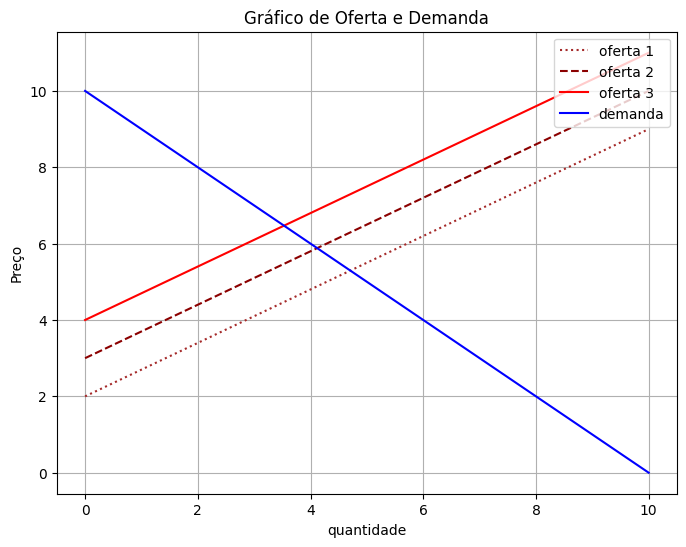

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Definindo as quantidades
quantidade = np.linspace(0, 10, 100)

# Definindo as funções de oferta
oferta1 = 2 + 0.7 * quantidade
oferta2 = 3 + 0.7 * quantidade
oferta3 = 4 + 0.7 * quantidade

# Definindo a função de demanda
demanda = 10 - quantidade

# Criando o gráfico
plt.figure(figsize=(8, 6))
plt.plot(quantidade, oferta1, label='oferta 1', color='brown', linestyle=':')
plt.plot(quantidade, oferta2, label='oferta 2', color='darkred', linestyle='--')
plt.plot(quantidade, oferta3, label='oferta 3', color='red', linestyle='-')
plt.plot(quantidade, demanda, label='demanda', color='blue')

# Adicionando o título e os eixos
plt.xlabel('quantidade')
plt.ylabel('Preço')
plt.title('Gráfico de Oferta e Demanda')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()



É possível identificar a equação de demanda, mas a equação de oferta não.

Isto ocorre porque podemos utilizar a variável z1 (preço da alimentação do gado) como instrumento do preço na equação (2). Porem, não temos um instrumento para o preço na equação (1).



In [23]:
# DataFrame
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/supdem.dta")
df['const'] = 1

In [47]:
# Estimar Oferta por 2SLS
simul1 = lm.IV2SLS(dependent=df["quantity"], exog=df[["const", "praw"]], endog=df["price"], instruments=df[["pcompete", "income"]], weights=None).fit(cov_type="robust")
print(simul1.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               quantity   R-squared:                      0.5928
Estimator:                    IV-2SLS   Adj. R-squared:                 0.5751
No. Observations:                  49   F-statistic:                    29.345
Date:                Thu, Jun 27 2024   P-value (F-stat)                0.0000
Time:                        17:32:07   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const         -2.5507     5.2647    -0.4845     0.6280     -12.869      7.7679
praw          -0.7835     0.1506    -5.2020     0.00

In [46]:
print(simul1.first_stage)

    First Stage Estimation Results   
                                price
-------------------------------------
R-squared                      0.5940
Partial R-squared              0.3825
Shea's R-squared               0.3825
Partial F-statistic            30.019
P-value (Partial F-stat)     3.03e-07
Partial F-stat Distn          chi2(2)
========================== ==========
const                          26.748
                             (27.248)
praw                           0.4922
                             (5.7220)
pcompete                       0.1783
                             (2.2353)
income                         0.3291
                             (5.4463)
-------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [34]:
print(simul1.sargan)

Sargan's test of overidentification
H0: The model is not overidentified.
Statistic: 0.5343
P-value: 0.4648
Distributed: chi2(1)


In [25]:
# Estimar a Demanda por IV
simul2 = lm.IV2SLS(dependent=df["quantity"], exog=df[["const", "pcompete", "income"]], endog=df["price"], instruments=df[["praw"]]).fit(cov_type="robust")
print(simul2.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               quantity   R-squared:                     -0.8477
Estimator:                    IV-2SLS   Adj. R-squared:                -0.9709
No. Observations:                  49   F-statistic:                    7.5722
Date:                Thu, Jun 27 2024   P-value (F-stat)                0.0557
Time:                        16:36:44   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          39.900     11.582     3.4451     0.0006      17.200      62.599
pcompete       0.3320     0.1887     1.7591     0.07